In [ ]:
#  Gọi các thư viên cần thiết
import numpy as np
import pandas as pd
from keras.datasets import cifar10 , cifar100
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# Chia dữ liệu thành 2 phần:  phần huyến luyện và phần test
(x_train, y_train),(x_test,y_test) = cifar100.load_data()


169017344/169001437 [==============================] - 2s 0us/step


<function matplotlib.pyplot.show>

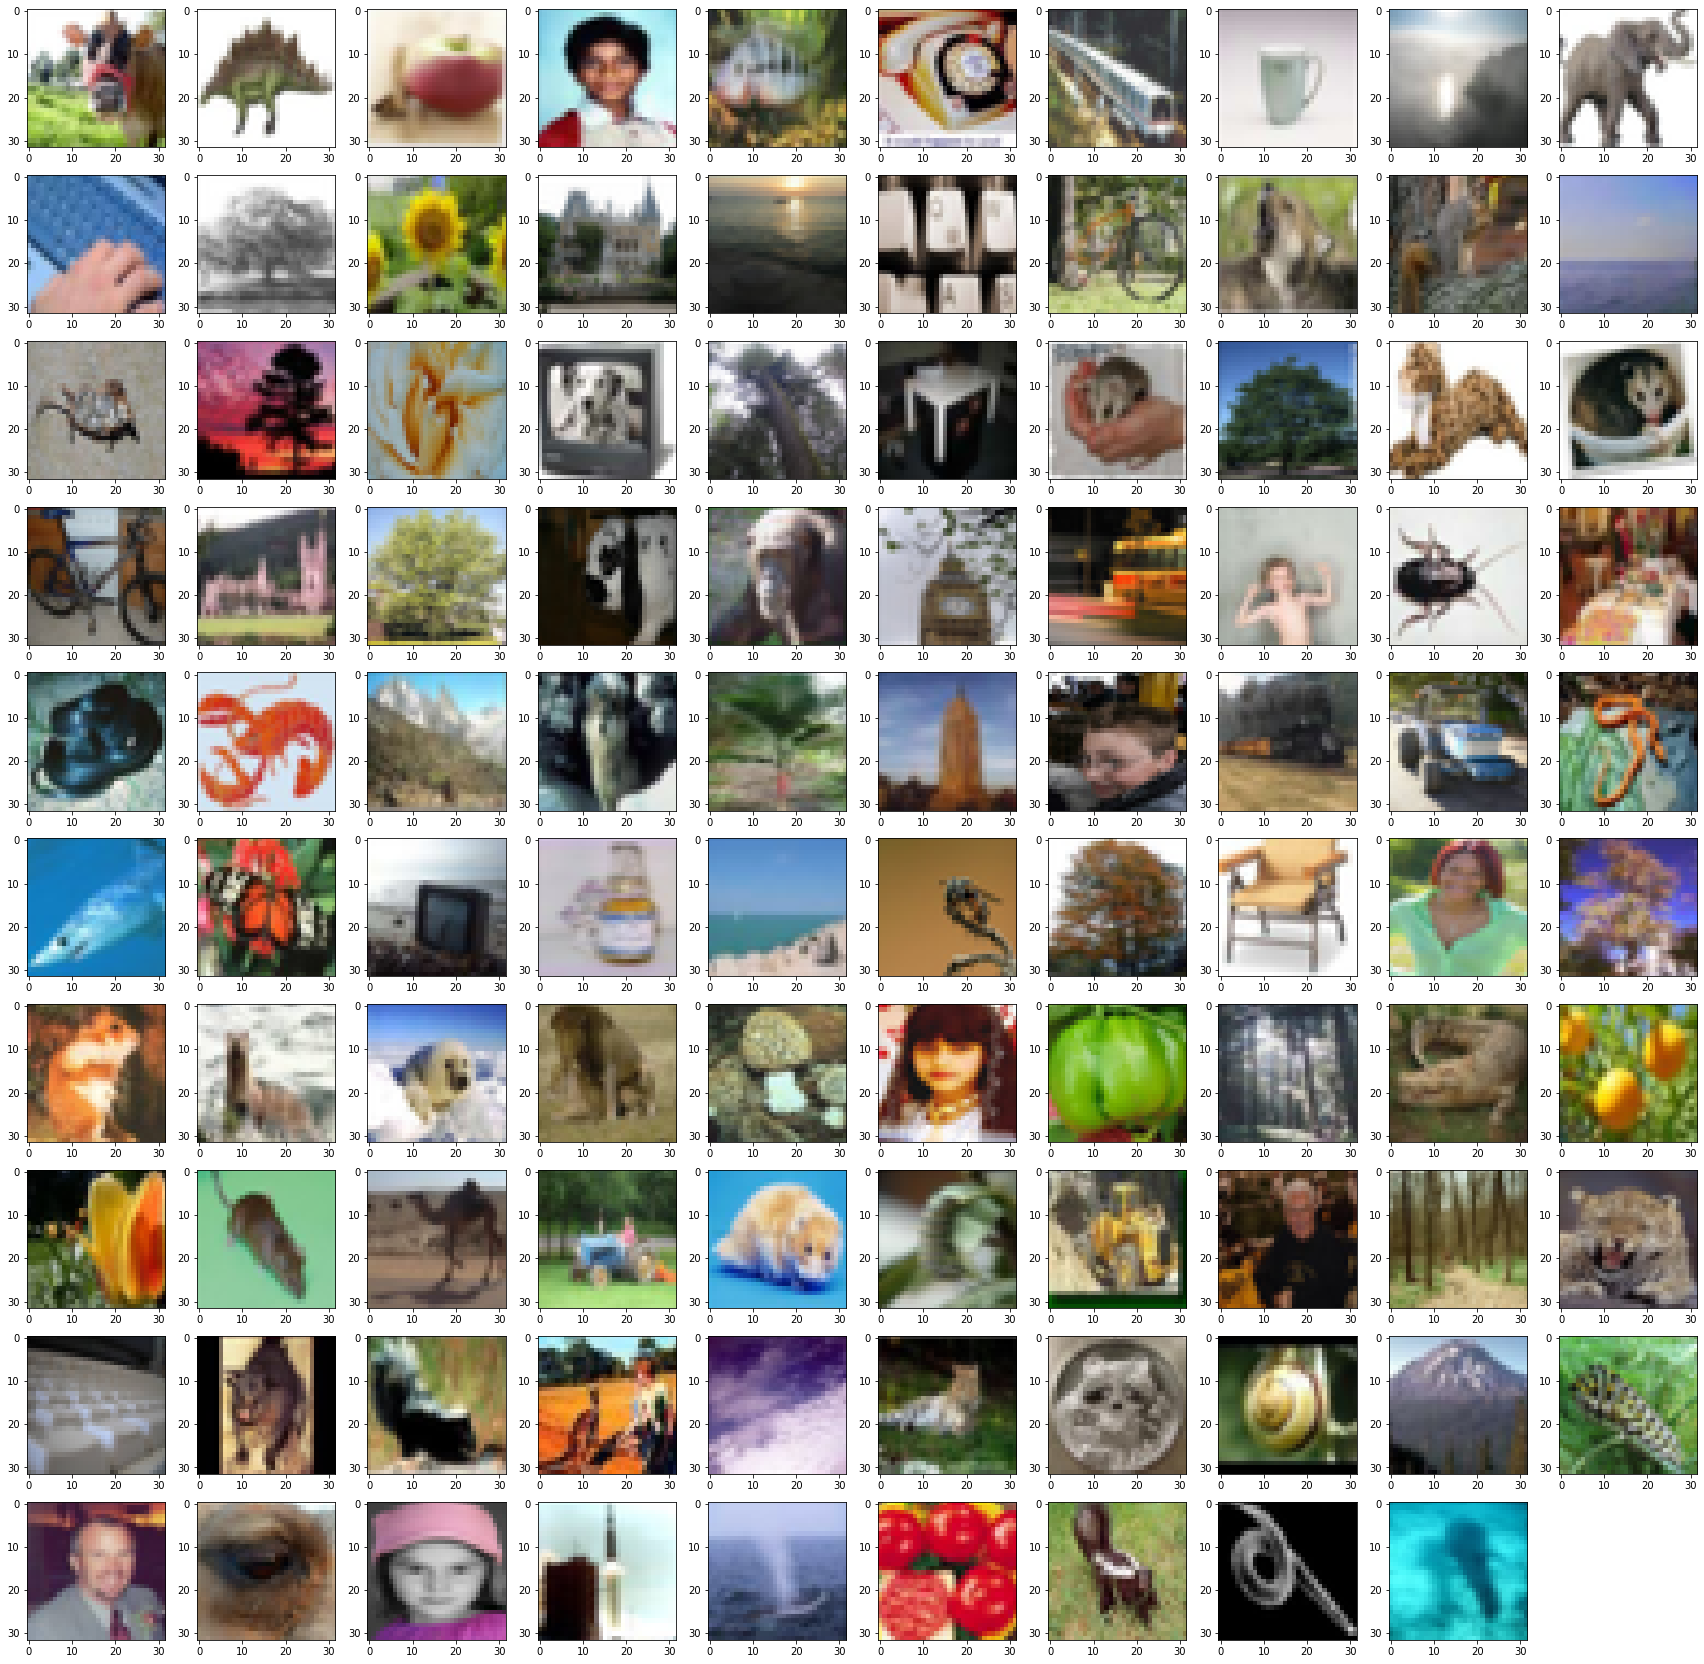

In [ ]:
plt.figure(figsize=(30,30))
for i in range(99):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i])
plt.show

In [ ]:
# Kích thước các tập dữ liệu
x_train.shape , x_test .shape,  y_train.shape,  y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
#  x_train , x_test  là mảng 4 chiều nên chuyển sang mảng 2 chiều 
x_train = x_train.reshape(50000 , 3072 )  #32*32*3
x_test = x_test.reshape(10000 ,  3072 )   #32*32*3

# Chuẩn hóa dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /= 255

# Chuyển y thành 100 class do output là 100
y_train =np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [ ]:
# Tạo mạng neron nhân tạo

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               5

In [ ]:
# Huấn luyện mô hình 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=500 , verbose=1 , validation_split=0.2 , callbacks=[EarlyStopping(monitor='val_loss',patience=70)])
# verbose=1  hiển thị  thanh tiến trình

Epoch 1/500
313/313 [==============================] - 5s 7ms/step - loss: 4.3710 - accuracy: 0.0393 - val_loss: 4.0803 - val_accuracy: 0.0720
Epoch 2/500
313/313 [==============================] - 2s 5ms/step - loss: 4.0615 - accuracy: 0.0740 - val_loss: 4.0439 - val_accuracy: 0.0767
Epoch 3/500
313/313 [==============================] - 2s 5ms/step - loss: 3.9169 - accuracy: 0.0970 - val_loss: 3.8421 - val_accuracy: 0.1125
Epoch 4/500
313/313 [==============================] - 2s 5ms/step - loss: 3.8280 - accuracy: 0.1093 - val_loss: 3.7645 - val_accuracy: 0.1319
Epoch 5/500
313/313 [==============================] - 2s 5ms/step - loss: 3.7596 - accuracy: 0.1218 - val_loss: 3.6918 - val_accuracy: 0.1387
Epoch 6/500
313/313 [==============================] - 2s 5ms/step - loss: 3.7097 - accuracy: 0.1290 - val_loss: 3.7219 - val_accuracy: 0.1292
Epoch 7/500
313/313 [==============================] - 2s 5ms/step - loss: 3.6741 - accuracy: 0.1357 - val_loss: 3.6750 - val_accuracy: 0.1406

In [ ]:
# Lưu kết quả của model
from tensorflow.keras.models import load_model
model.save('huyCifar100.h5')
load_model('huyCifar100.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])


Sai số kiểm tra là:  3.5452253818511963
Độ chính xác kiểm tra là:  0.17579999566078186


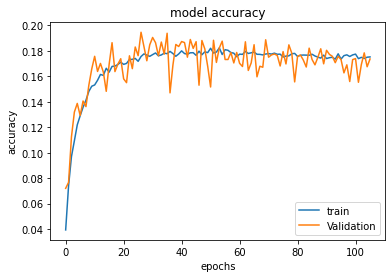

In [ ]:
# Vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
# Kiểm tra kết quả của mô hình
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
filename = 'Nai.png'
img = load_img(filename, target_size =(32,32))
img.show(filename)
img = img_to_array(img)
img = img.astype('float32')
img = img/255
img=img.reshape(1,32*32*3)
np.argmax (model.predict(img) , axis =-1)

array([74])